In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
help(patheffects.withSimplePatchShadow)

Help on class withSimplePatchShadow in module matplotlib.patheffects:

class withSimplePatchShadow(SimplePatchShadow)
 |  Adds a simple :class:`SimplePatchShadow` and then draws the
 |  original Artist to avoid needing to call :class:`Normal`.
 |  
 |  Method resolution order:
 |      withSimplePatchShadow
 |      SimplePatchShadow
 |      AbstractPathEffect
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draw_path(self, renderer, gc, tpath, affine, rgbFace)
 |      Overrides the standard draw_path to add the shadow offset and
 |      necessary color changes for the shadow.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SimplePatchShadow:
 |  
 |  __init__(self, offset=(2, -2), shadow_rgbFace=None, alpha=None, rho=0.3, **kwargs)
 |      Parameters
 |      ----------
 |      offset : pair of floats
 |          The offset of the shadow in points.
 |      shadow_rgbFace : color
 |          The shadow color.
 |    

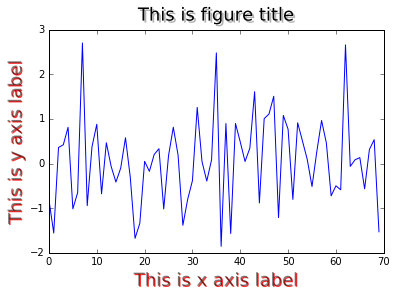

In [10]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np

data = np.random.randn(70)

fontsize = 18
plt.plot(data)
title = 'This is figure title'
x_label = 'This is x axis label'
y_label = 'This is y axis label'
s
title_text_obj = plt.title(
    title, fontsize=fontsize, verticalalignment='bottom')

title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

# offset_xy -- set the 'angele' of the shadow
# shadow_rgbFace -- set the color of the shadow
# patch_alpha -- setup the transparency of shadow

offset_xy = (1, -1)
rgbFace = (1.0, 0.0, 0.0) # Red
alpha = 0.8

# customize shadow properties
pe = patheffects.withSimplePatchShadow(
    offset=offset_xy, shadow_rgbFace=rgbFace, alpha=alpha)

# apply them to the xaxis and yaxis labels
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
xlabel_obj.set_path_effects([pe])

ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.show()

# matplotlib 组织图标 の 过程
## 最上层是一个 Figure 实例 包含所有可见的和其他不可见的内容 该 Figure 实例包含了一个 Axes 实例字段 Figure.axes  Axes 实例包含所有关心的所有东西：